In [5]:
import pandas as pd
import numpy as np

np.random.seed(42)

n = 2000

data = pd.DataFrame({
    "customer_id": range(1, n+1),
    "age": np.random.randint(21, 65, n),
    "annual_income": np.random.normal(75000, 25000, n).astype(int),
    "employment_length": np.random.randint(0, 20, n),
    "credit_score": np.random.normal(680, 70, n).astype(int),
    "loan_amount": np.random.normal(15000, 8000, n).astype(int),
    "interest_rate": np.random.uniform(5, 25, n),
    "debt_to_income": np.random.uniform(5, 50, n),
    "loan_term": np.random.choice([36, 60], n),
    "previous_defaults": np.random.choice([0,1], n, p=[0.85, 0.15]),
    "loan_purpose": np.random.choice(
        ["Car", "Credit Card", "Home Improvement", "Personal"], n)
})

# Create realistic default probability
data["default_probability"] = (
    (700 - data["credit_score"]) * 0.002 +
    (data["debt_to_income"] * 0.01) +
    (data["previous_defaults"] * 0.15) +
    (data["interest_rate"] * 0.005)
)

data["default"] = np.where(data["default_probability"] > 0.5, 1, 0)

data.drop(columns=["default_probability"], inplace=True)

data.to_csv("credit_risk_dataset.csv", index=False)

print("Dataset created!")

Dataset created!


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [7]:
df = pd.read_csv("credit_risk_dataset.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        2000 non-null   int64  
 1   age                2000 non-null   int64  
 2   annual_income      2000 non-null   int64  
 3   employment_length  2000 non-null   int64  
 4   credit_score       2000 non-null   int64  
 5   loan_amount        2000 non-null   int64  
 6   interest_rate      2000 non-null   float64
 7   debt_to_income     2000 non-null   float64
 8   loan_term          2000 non-null   int64  
 9   previous_defaults  2000 non-null   int64  
 10  loan_purpose       2000 non-null   object 
 11  default            2000 non-null   int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 187.6+ KB


,customer_id,age,annual_income,employment_length,credit_score,loan_amount,interest_rate,debt_to_income,loan_term,previous_defaults,default
count,2000.000000,2000.000000,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000
mean,1000.500000,42.694000,74331.035000,9.6575,677.213500,14849.779000,15.012126,27.431933,47.952000,0.157000,0.34400
std,577.494589,12.614195,24521.095298,5.7771,71.131313,8258.221134,5.830146,13.182211,12.002905,0.363892,0.47516
min,1.000000,21.000000,-11785.000000,0.0000,429.000000,-11780.000000,5.003155,5.060014,36.000000,0.000000,0.00000
25%,500.750000,32.000000,57592.250000,5.0000,630.000000,9315.000000,9.925814,15.729391,36.000000,0.000000,0.00000
50%,1000.500000,43.000000,74603.000000,10.0000,677.500000,14909.000000,14.816776,27.062848,36.000000,0.000000,0.00000
75%,1500.250000,54.000000,91329.750000,15.0000,724.000000,20450.000000,20.171496,39.290904,60.000000,0.000000,1.00000
max,2000.000000,64.000000,151548.000000,19.0000,906.000000,42185.000000,24.993464,49.948017,60.000000,1.000000,1.00000


In [8]:
df.isnull().sum()


,0
customer_id,0
age,0
annual_income,0
employment_length,0
credit_score,0
loan_amount,0
interest_rate,0
debt_to_income,0
loan_term,0
previous_defaults,0


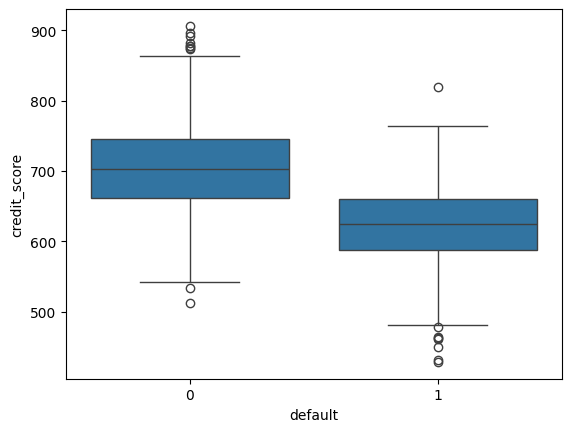

In [10]:
df["default"].value_counts(normalize=True)

sns.boxplot(x="default", y="credit_score", data=df)
plt.show()

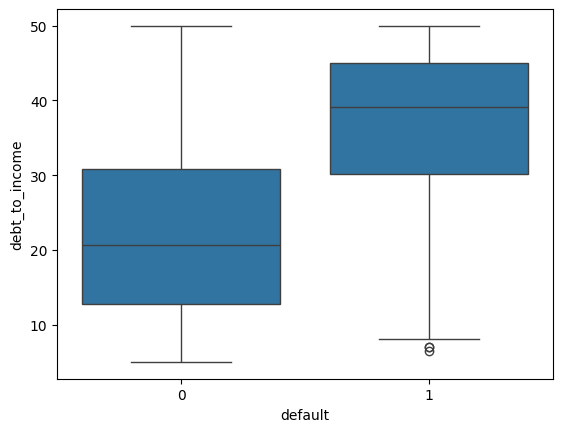

In [11]:
sns.boxplot(x="default", y="debt_to_income", data=df)
plt.show()

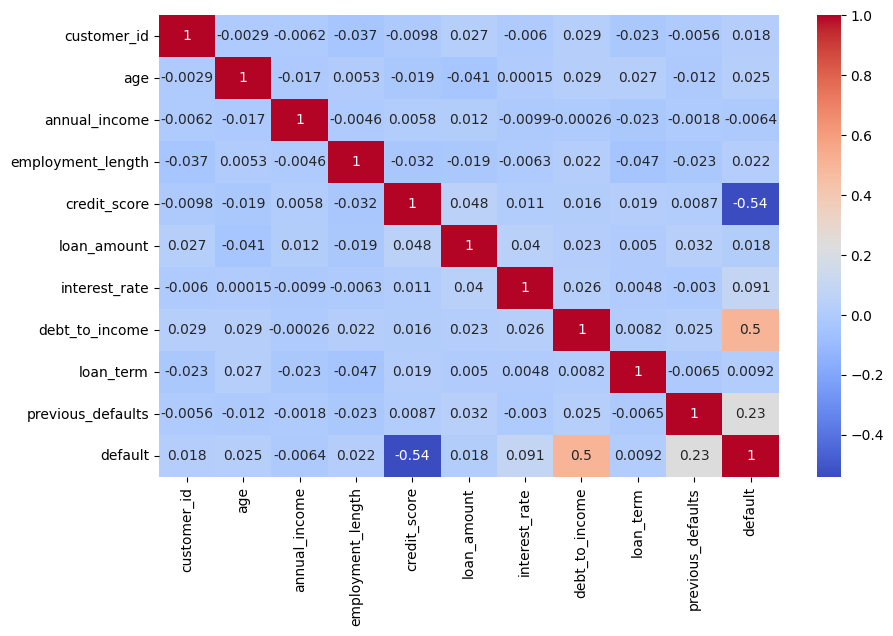

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

In [15]:
df["loan_to_income_ratio"] = df["loan_amount"] / df["annual_income"]
df = pd.get_dummies(df, drop_first=True)

In [16]:
X = df.drop("default", axis=1)
y = df["default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       273
           1       0.78      0.80      0.79       127

    accuracy                           0.87       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.87      0.87      0.87       400



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
